# Лабораторная работа 1. 

## Задачи машинного обучения: Задача о конверсии сайта


## Постановка задачи

**Цель:** На примере построения математической модели зависимости количества регистрации (и скачиваний) программного продукта от количества посещений сайта освоить работу с моделями библиотеки scikit-learn.

**Реализации:**

1. Средствами _Python_ и _Numpy_
2. С использованием _Python_, _Numpy_ и _Scilit-Learn_

**Задачи:**

1. Вывести формулы для построения линейной регрессии (метод наименьших квадратов)
2. Используя данные из [статьи](https://habr.com/ru/companies/nerepetitor/articles/250633/) построить таблицу зависимости регистраций на сайте от посещений, визуализировать данные.
3. Реализовать метод наименьших квадратов (используя только «самописные» функции).
4. Реализовать метод наименьших квадратов (используя sklearn).
5. Ответить на вопросы.


## Вывод коэффициентов линейной регрессии:

![](images/vivod_koef.jpg)

## Загрузка и визуализация данных


In [12]:
import pandas as pd
import numpy as np

data = pd.read_csv("data/website_stat.csv")

days = np.array(data["day"])
views = np.array(data["views"])
regs = np.array(data["regs"])

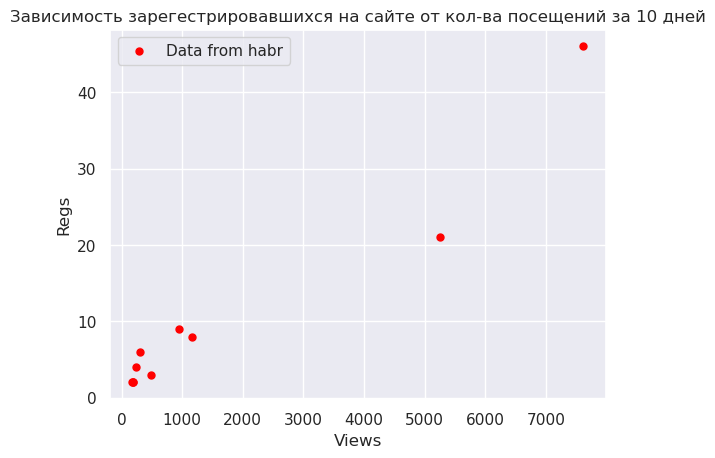

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.scatter(
    views, regs, c="red", s=25, label="Data from habr"
)
plt.ylabel("Regs")
plt.xlabel("Views")
plt.title("Зависимость зарегестрировавшихся на сайте от кол-ва посещений за 10 дней")
plt.legend()
plt.show()

## Реализация МНК самописными функциями

In [14]:
def getA(x,y):
  n = len(x)
  XY = 0
  X = 0
  Y = 0
  XX = 0
  for i in range(n):
    XY += (x[i]*y[i])
    X += x[i]
    Y += y[i]
    XX += x[i]**2
  a = (n * XY - X * Y) / (n * XX - (X**2))
  
  return a

In [15]:
def getB(a,x,y):
  n=len(x)
  b = 0
  for i in range(n):
    b += y[i] - a * x[i]
  b /= n
  return b

In [16]:
a = getA(views, regs)
b = getB(a, views, regs)
print(f"a = {a}")
print(f"b = {b}")

a = 0.005140311311538676
b = 1.792270748272338


In [17]:
Y = []
for i in range(len(views)):
  Y.append(views[i]*a + b)
print(Y)

[28.78918575647346, 40.961442942197046, 6.6293036924302315, 7.749891558345663, 4.285321734368596, 3.3292238304224018, 3.020805151730081, 2.7946314540223796, 2.7226670956608383, 2.7175267843492996]


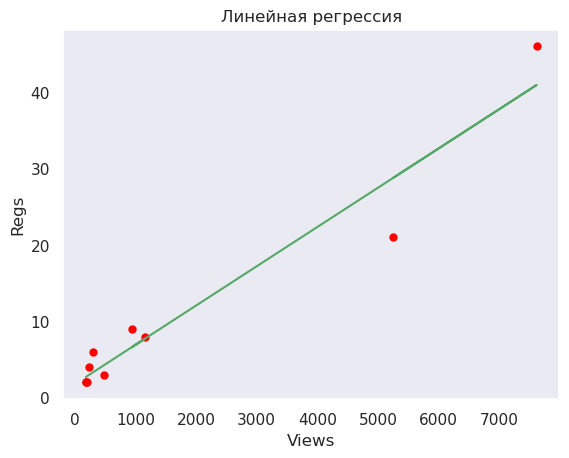

In [18]:
plt.title('Линейная регрессия')
plt.scatter(views,regs, c="red", s=25, label="Data from habr")
plt.plot(views,Y,"g")
plt.grid()
plt.xlabel('Views')
plt.ylabel('Regs')
plt.show()

## Реализация МНК с помощью sklearn

  a 
0.005140311311538676 | 0.0051403113115386775
  b 
1.792270748272338 | 1.7922707482723368


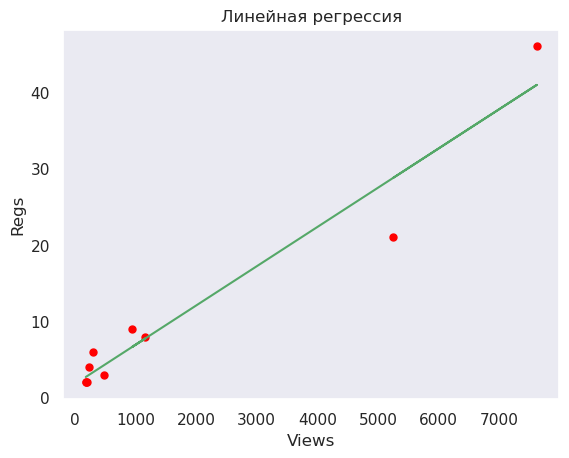

In [19]:
from sklearn import linear_model

model = linear_model.LinearRegression()

x = data.views
y = data.regs

model.fit(x.values.reshape(-1, 1), y.values.reshape(-1, 1))
print(f"  a \n{a} | {model.coef_[0,0]}")
print(f"  b \n{b} | {model.intercept_[0]}")

LR=model.predict(x.values.reshape(-1, 1))

plt.title('Линейная регрессия')
plt.scatter(data.views, data.regs, c="red", s=25, label="Data from habr")
plt.plot(x,LR,"g")
plt.grid()
plt.xlabel('Views')
plt.ylabel('Regs')
plt.show()

## Проверка качества

In [20]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
print('Кф. детерминации: \n', 
r2_score(y, LR), r2_score(y, Y))
print('Макс. достаточная ошибка: \n', 
max_error(y, LR), max_error(y, Y))
print('Ср. квадратичная ошибка: \n',
mean_squared_error(y, LR), mean_squared_error(y, Y))
print('Ср. абсолютная ошибка: \n', 
mean_absolute_error(y, LR), mean_absolute_error(y, Y))
print('Медианная абсолютная ошибка: \n', 
median_absolute_error(y, LR), median_absolute_error(y, Y))
print('Ср. абсолютная процентная  ошибка: \n', 
mean_absolute_percentage_error(y, LR), mean_absolute_percentage_error(y, Y))

Кф. детерминации: 
 0.9398205013629717 0.9398205013629717
Макс. достаточная ошибка: 
 7.789185756473472 7.7891857564734615
Ср. квадратичная ошибка: 
 10.315367861373018 10.315367861373018
Ср. абсолютная ошибка: 
 2.261866564974915 2.2618665649749152
Медианная абсолютная ошибка: 
 1.1322582913192576 1.1322582913192574
Ср. абсолютная процентная  ошибка: 
 0.30109030313845364 0.30109030313845375


**Вывод**: Реализация самописными функциями почти не имеет погрешности. Обе модели линейной регрессии имеют коеф детерминации ~0,94. Это показывает то, что имеется зависимость колличества скачиваний от колличества посещений.

## Ответы на вопросы

1) При количестве посещений сайта в 8000 человек, сколько планируется получить зарегистрировавшихся (или скачавших) программный продукт?

In [21]:
print(f"Ответ: ~ {model.predict([[8000]])[0,0]} скачиваний")

Ответ: ~ 42.914761240581754 скачиваний


2) Для обеспечения 500 скачиваний продукта, сколько человек должны зайти на сайт?

In [22]:
model1 = linear_model.LinearRegression()
model1.fit( y.values.reshape(-1, 1), x.values.reshape(-1, 1) )
print(f"Ответ: ~ {model1.predict([[500]])[0,0]} 'человек")

Ответ: ~ 91188.6071407736 'человек


## Список литературы:

1. Исходные данные https://habr.com/ru/company/nerepetitor/blog/250633/
2. Коеф детерминации http://statistica.ru/theory/koeffitsient-determinatsii-i-lineynaya-regressiya/
3. scikit-learn documentation https://scikit-learn.org/
4. seaborn documentation https://seaborn.pydata.org/
5. pandas documentation https://pandas.pydata.org/
6. NumPy documentation http://www.numpy.org/
7. pyplot documentation https://matplotlib.org/stable/tutorials/introductory/pyplot.html